# Initialisation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# First column is the label of the image and then the 784 values of the pixels
data_train = pd.read_csv('MNIST_CSV/mnist_train.csv', header=None)
data_test = pd.read_csv('MNIST_CSV/mnist_test.csv', header=None)

In [2]:
data_train = np.array(data_train)
data_test = np.array(data_test)
data = np.concatenate((data_train, data_test), axis=0)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets
maximum_data = 60000


data_test = data[0:maximum_data].T
Y_test = data_test[0]
X_test = data_test[1:n]
X_test = X_test / 255.

data_train = data[maximum_data:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

Y_train

array([9, 8, 1, ..., 0, 9, 2], dtype=int64)

In [3]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    print("Final accuracy: ", get_accuracy(predictions, Y))
    return W1, b1, W2, b2

## Training

In [4]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, m//6)

Iteration:  0
[0 2 5 ... 0 0 0] [9 8 1 ... 0 9 2]
0.0976
Iteration:  10
[2 2 5 ... 0 4 0] [9 8 1 ... 0 9 2]
0.1149
Iteration:  20
[2 2 5 ... 0 4 0] [9 8 1 ... 0 9 2]
0.1285
Iteration:  30
[2 2 8 ... 0 4 0] [9 8 1 ... 0 9 2]
0.14
Iteration:  40
[2 2 8 ... 0 4 0] [9 8 1 ... 0 9 2]
0.1497
Iteration:  50
[2 2 8 ... 0 4 0] [9 8 1 ... 0 9 2]
0.1581
Iteration:  60
[2 2 8 ... 0 6 0] [9 8 1 ... 0 9 2]
0.1674
Iteration:  70
[2 2 8 ... 0 6 0] [9 8 1 ... 0 9 2]
0.1778
Iteration:  80
[2 2 8 ... 0 6 0] [9 8 1 ... 0 9 2]
0.1874
Iteration:  90
[2 2 1 ... 0 6 0] [9 8 1 ... 0 9 2]
0.1976
Iteration:  100
[2 2 1 ... 0 6 0] [9 8 1 ... 0 9 2]
0.2056
Iteration:  110
[2 2 1 ... 0 6 0] [9 8 1 ... 0 9 2]
0.2152
Iteration:  120
[2 2 1 ... 0 6 0] [9 8 1 ... 0 9 2]
0.2262
Iteration:  130
[2 2 1 ... 0 6 0] [9 8 1 ... 0 9 2]
0.235
Iteration:  140
[2 2 1 ... 0 6 0] [9 8 1 ... 0 9 2]
0.2479
Iteration:  150
[2 0 1 ... 0 6 0] [9 8 1 ... 0 9 2]
0.2581
Iteration:  160
[2 0 1 ... 0 6 0] [9 8 1 ... 0 9 2]
0.2687
Iteration: 

## Test

In [5]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

In [6]:
# Exemple of ten good predictions and ten bad predictions
predictions = make_predictions(X_test, W1, b1, W2, b2)
list_good_pred = predictions == Y_test
list_bad_pred = predictions != Y_test

print(f"Accuracy on test set: {get_accuracy(predictions, Y_test)}")

[1 5 3 ... 0 0 8] [2 5 3 ... 0 0 8]
Accuracy on test set: 0.8843666666666666


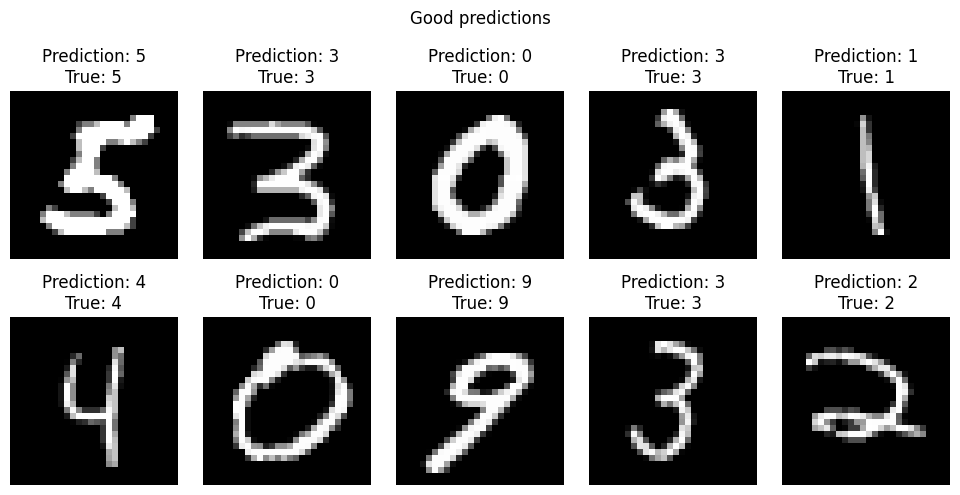

In [7]:
plt.figure(figsize=(10, 5))
plt.suptitle("Good predictions")
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[:,list_good_pred][:,i].reshape(28,28), cmap='gray')
    plt.title(f"Prediction: {predictions[list_good_pred][i]}\nTrue: {Y_test[list_good_pred][i]}")
    plt.axis('off')
    plt.tight_layout()
plt.show()

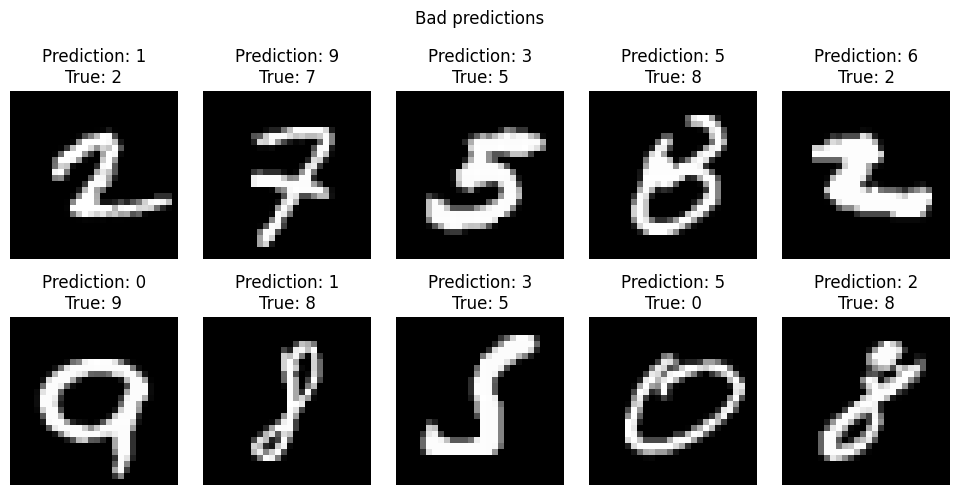

In [8]:
plt.figure(figsize=(10, 5))
plt.suptitle("Bad predictions")
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[:,list_bad_pred][:,i].reshape(28,28), cmap='gray')
    plt.title(f"Prediction: {predictions[list_bad_pred][i]}\nTrue: {Y_test[list_bad_pred][i]}")
    plt.axis('off')
    plt.tight_layout()
plt.show()